In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn
%matplotlib inline

# Setting nice axes labels in matplotlib

In this post I want to collect some ideas I had on setting nice labels in matplotlib. In particular, for scientific papers we usually want a label like "time [s]". Then, if the data is very large we may put the exponent next to the units like "time [$10^{-6}$s]", better still is to use an SI prefix e.g "time [$\mu$s]". 

### The defaults

`Matplotlib` already has useful routines to format the ticks, but it usually puts the exponent somewhere near to the top of the axis. Here is a typical example using the defaults

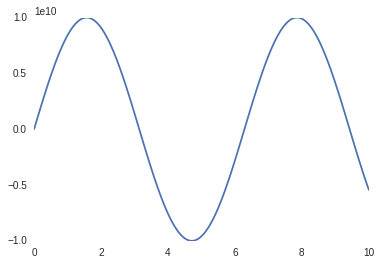

In [10]:
x = np.linspace(0, 10, 1000)
y = 1e10 * np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

### Improving on the defaults
For a scientific publication we tend to use $\times10^{10}$ or $10^{10}$, this can easily be achieved with the ScalarFormatter. [There is an example on the docs](http://matplotlib.org/examples/pylab_examples/newscalarformatter_demo.html), but here is a simpler one:

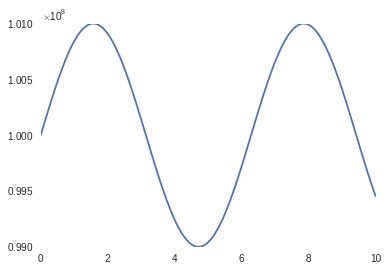

In [25]:
x = np.linspace(0, 10, 1000)
y = 1e8 + 1e6 * np.sin(x)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
ax.plot(x, y)
plt.show()

Note there are two options set here, the first `useMathText` forces the scientific notation, while the `useOffset` stops the offset being used which makes most plots illegible in my opinion

### Customing the results

At some point I ran into an issue with the location of where the exponent was positioned, it was overlapping with other subplots. I did the usual trick and went to StackOverflow and was helpfully redirected to [this post](http://stackoverflow.com/questions/31517156/adjust-exponent-text-after-setting-scientific-limits-on-matplotlib-axis) which by chance was posted the same day. Building on the ideas posted there I have developed the following:

In [2]:
def update_label(old_label, exponent_text):
    if exponent_text == "":
        return old_label
    
    try:
        units = old_label[old_label.index("[") + 1:old_label.rindex("]")]
    except ValueError:
        units = ""
    label = old_label.replace("[{}]".format(units), "")
    
    exponent_text = exponent_text.replace("\\times", "")
    
    return "{} [{} {}]".format(label, exponent_text, units)
    
def format_label_string_with_exponent(ax, axis='both'):  
    """ Format the label string with the exponent from the ScalarFormatter """
    ax.ticklabel_format(axis=axis, style='sci')

    axes_instances = []
    if axis in ['x', 'both']:
        axes_instances.append(ax.xaxis)
    if axis in ['y', 'both']:
        axes_instances.append(ax.yaxis)
    
    for ax in axes_instances:
        ax.major.formatter._useMathText = True
        plt.draw() # Update the text
        exponent_text = ax.get_offset_text().get_text()
        label = ax.get_label().get_text()
        ax.offsetText.set_visible(False)
        ax.set_label_text(update_label(label, exponent_text))


Which can be used like this

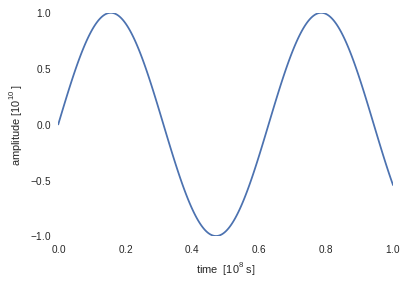

In [35]:
fig, ax = plt.subplots()

x = np.linspace(0, 1e8, 1000)
y = 1e10 * np.sin(1e-7*x)

ax.plot(x, y)
ax.set_ylabel("amplitude")
ax.set_xlabel("time [s]")
format_label_string_with_exponent(ax, axis='both')
plt.show()

As you will see, the label is edited and given the exponent, if units exist they are appended to that. While this isn't the most flexible solution, it is quite a standard notation.

### An interactive widget to check it works in all the right ways

In [41]:
x = np.linspace(0, 10, 1000)
y = 1e10 * np.sin(x)

def plot(xlabel="time [s]", ylabel="amplitude [Watts]", axis="both"):
    fig, ax = plt.subplots()
    
    ax.plot(x, y)
    ax.set_ylabel(xlabel)
    ax.set_xlabel(ylabel)
    format_label_string_with_exponent(ax, axis=axis)
    plt.show()
    

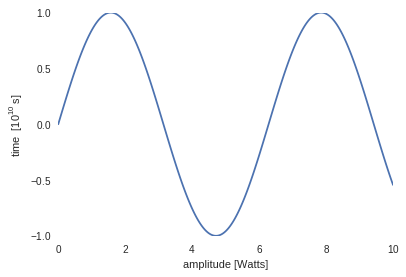

In [48]:
from IPython.html.widgets import interact

interact(plot, axis=["x", "y", "both"])